#Лабораторная работа №1

Круглый цилиндрический бак с вертикальной осью, диаметром 2R и высотой H полонен
водой. Из бака вода вытекает через круглое отверстие диаметром 2а в дне бака. Определить
время опорожнения бака.
  * R = 1 м;
  * H = 2,25 м;
  * а = 0,05 м;
  * µ = 0,62 (для воды).

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

In [145]:
x0 = 0
y0 = 2.25
a = 0
b = 500
R = 1
r = 0.05
mu = 0.62
g = 9.81
N = 5
eps = 0.000001
np.set_printoptions(suppress=True, threshold=sys.maxsize)

In [132]:
def f(x, y):
    return (-1) * (pow(r, 2) * mu * pow(2 * g * y, (1 / 2))) / pow(R, 2)

In [110]:
print(f(2.25, 2.25))

-0.0102984640845128


In [134]:
def calc_Runge_Kutta(f, y, x, h):
    k1 = h * f(x, y)
    k2 = h * f(x + h / 2, y + k1 / 2)
    k3 = h * f(x + h / 2, y + k2 / 2)
    k4 = h * f(x + h, y + k3)
    delta_y = (k1 + 2 * k2 + 2 * k3 + k4) / 6
    y = y + delta_y
    return y

In [135]:
def method_Runge_Kutta(f, y0, x0, a, b, N, eps):
    x = x0
    y = y0
    h = (b - a) / N
    i = 0
    table = [[0, 0, 0]]
    x_values = []  # Список для хранения значений x
    y_values = []  # Список для хранения значений y
    while x <= b:
        while np.abs(calc_Runge_Kutta(f, y, x, (b - a) / (2 * N)) - calc_Runge_Kutta(f, y, x, h)) / 15 > eps:
            N *= 2
            h = (b - a) / N
        y = calc_Runge_Kutta(f, y, x, h)

        if y.real >= 0:
          i += 1
          x_values.append(x.real)  # Добавляем текущее значение x
          y_values.append(y.real)  # Добавляем текущее значение y
          table.append([i, x.real, y.real])
          x += h

        else:
          break

    return table, x_values, y_values

In [146]:
res, x_vals, y_vals = method_Runge_Kutta(f, y0, x0, a, b, N, eps)

In [147]:
# Вывод результата
res = np.array(res)
print("iter\t   x\t\t   y")
print(res)

Выходные данные были обрезаны до нескольких последних строк (5000).
 [281365.            429.32739258      0.00068594]
 [281366.            429.32891846      0.00068567]
 [281367.            429.33044434      0.00068539]
 [281368.            429.33197021      0.00068512]
 [281369.            429.33349609      0.00068485]
 [281370.            429.33502197      0.00068457]
 [281371.            429.33654785      0.0006843 ]
 [281372.            429.33807373      0.00068402]
 [281373.            429.33959961      0.00068375]
 [281374.            429.34112549      0.00068348]
 [281375.            429.34265137      0.0006832 ]
 [281376.            429.34417725      0.00068293]
 [281377.            429.34570312      0.00068265]
 [281378.            429.347229        0.00068238]
 [281379.            429.34875488      0.00068211]
 [281380.            429.35028076      0.00068183]
 [281381.            429.35180664      0.00068156]
 [281382.            429.35333252      0.00068129]
 [281383.     

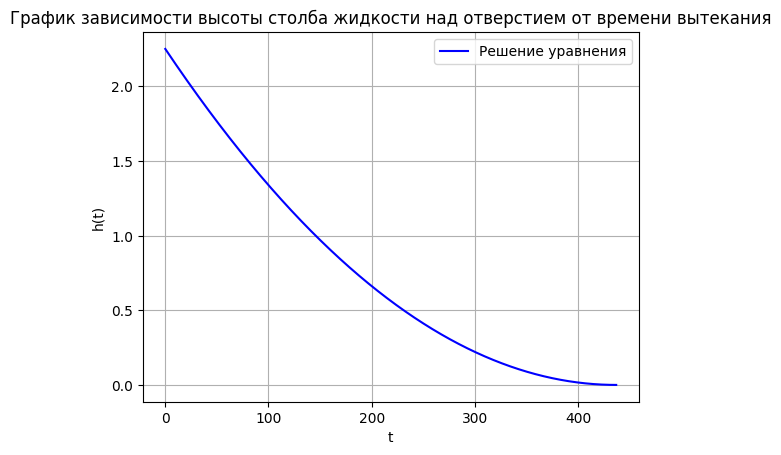

In [148]:
# Построение графика
plt.plot(x_vals, y_vals, label='Решение уравнения', color='b')
plt.title('График зависимости высоты столба жидкости над отверстием от времени вытекания')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.grid(True)
plt.legend()
plt.show()